# 7. Dimensionality Reduction with PCA(Principal Component Analysis)


## motivated by
 
- first. mitigate problems caused by the curse of dimensionality
- second. dimensionality reduction can be used to compress data wile minimizing the amount of information that is lost
- third. understanding the structure of data with hundreds of dimensions can be difficult

##thus.
- high-dimensional dataset >> two or three dimensions
- more dimension -> more sample required exponentially, more memory, more processing power

 ## 응용
 - 신호처리 분야 : 이산 카루넨-뢰브 변환(Karhunen-Loève transform 또는 KLT)
 - 다변수 품질 관리에서는 호텔링 변환
 - 기계공학에서는 적합 직교 분해(POD)
 - 선형대수학에서는 특이 값 분해(Singular Value Decomposition; SVD) 또는 고유 값 분해(Eigen Value Decomposition; EVD), 인자 분석(주성분 분석과 인자 분석의 차이점에 관한 논의는 [2]의 7장을 보면 된다.)
 - 심리측정학의 Eckart–Young 이론 (Harman, 1960) 또는 Schmidt–Mirsky 이론
 - 기상 과학의 실증 직교 함수(EOF), 
 - 소음과 진동의 실증적 고유 함수 분해(Sirovich, 1987)와 실증적 요소 분석(Lorenz, 1956), 준조화모드(Brooks et al., 1988), 스펙트럼 분해, 
 - 구조 동역학의 실증적 모델 분석
 
 [출처] https://ko.wikipedia.org/wiki/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D

PCA is most useful when the variance in a data set is distributed unevenly across the dimensions. 


## 주요 용어


- Variance(분산) : how a set of values are spread out
- Covariance(공분산) : how much two variables change together(Covariance measure linear dependence)
 - Cov(X,Y) = 0 ≠> independent
- eigen vector, eigen value (eigen pair)  -- Important but using SVD(SVD is more faster)

 <img src='https://upload.wikimedia.org/math/7/f/6/7f68feea2e8797ebcfe2d7619fde3d08.png' align=left>


 - Eigenvectors and eigenvalues can only be derived from square matrices

###선형대수 이론(다크프로그래머)
- <a href='http://darkpgmr.tistory.com/103'>[선형대수학 #1] 주요용어 및 기본공식</a>
- <a href='http://darkpgmr.tistory.com/104'>[선형대수학 #2] 역행렬과 행렬식(determinant)</a>
- <a href='http://darkpgmr.tistory.com/105'>[선형대수학 #3] 고유값과 고유벡터 (eigenvalue & eigenvector)</a>
- <a href='http://darkpgmr.tistory.com/106'>[선형대수학 #4] 특이값 분해(Singular Value Decomposition, SVD)의 활용</a>
- <a href='http://darkpgmr.tistory.com/108'>[선형대수학 #5] 선형연립방정식 풀이</a>
- <a href='http://darkpgmr.tistory.com/110'>[선형대수학 #6] 주성분분석(PCA)의 이해와 활용</a>

###대학강의
- <a href='http://www.kocw.net/home/search/kemView.do?kemId=1043234'>선형대수(한양대학교, 유경렬)</a>

###First example(covariance)

In [1]:
import numpy as np
X = [[2, 0, -1.4],
    [2.2, 0.2, -1.5],
    [2.4, 0.1, -1],
    [1.9, 0, -1.2]]
print np.cov(np.array(X).T)

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


###Second Example(Eigenvectors and eigenvalues)

In [2]:
import numpy as np
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
w; v
print 'eigenvalues(w) : \n',w,'\n\neigenvectors(v) :\n', v

eigenvalues(w) : 
[-0.99999998 -1.00000002] 

eigenvectors(v) :
[[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


####Rotatin Matrix
<img src='https://upload.wikimedia.org/math/3/8/f/38f4b1b17056c57ea7cb7f2188c9a81a.png' align=left>
<img src='https://upload.wikimedia.org/math/7/5/2/752fd6396a9c9d026f10eccb39ddca15.png' align=mid>
<img src='https://upload.wikimedia.org/math/f/3/3/f338c036c7b38d2541d15ca1601e8803.png' align=left>

###Third Example(Dimensionality reduction with PCA)

- 공분산행렬의 고유벡터가 데이터 분포의 분산 방향
- 고유값이 그 분산의 크기

COV
[[ 0.68677778  0.60666667]
 [ 0.60666667  0.59777778]]

Eigenvalue
[ 1.25057433  0.03398123] 

EigenVector
[[ 0.73251454 -0.68075138]
 [ 0.68075138  0.73251454]]
0.732514541884 -0.680751383347 0.680751383347 0.732514541884


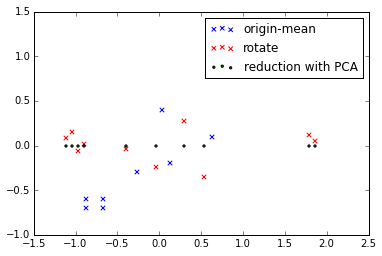

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Origin value
x1 = [0.9, 2.4, 1.2, 0.5, 0.3, 1.8, 0.5, 0.3, 2.5, 1.3]
x2 = [1, 2.6, 1.7, 0.7, 0.7, 1.4, 0.6, 0.6, 2.6, 1.1]
c = np.cov(x1, x2)
print "COV\n", c

w, v = np.linalg.eig(np.array(c))
print "\nEigenvalue\n",w, "\n\nEigenVector\n", v

#  Origin value - Mean
x, y = [],[]
x_1, y_1 = [],[]

print v[0][0], v[0][1],v[1][0],v[1][1]
for i in range(10):
    x.append((x1[i]-1.17))
    y.append((x2[i]-1.3))
    x_1.append((x1[i]-1.17)*v[0][0]+(x2[i]-1.3)*v[1][0])
    y_1.append((x1[i]-1.17)*v[0][1]+(x2[i]-1.3)*v[1][1])        

# PCA transform * eigenvalue
z1 = [-0.40200434,1.78596968,0.29427599,-0.89923557,-1.04573848,
   0.52955,-0.96731071,-1.11381362,1.85922113,-0.04092339]
z2 = [0,0,0,0,0,0,0,0,0,0]

plt.scatter(x, y, c='b', marker='x', label='origin-mean')
plt.scatter(x_1, y_1, c='r', marker='x', label='rotate')
plt.scatter(z1, z2, c='g', marker='.', label='reduction with PCA')
plt.legend()

plt.show()

###Fourth Example(Dimensionality reduction with PCA)

<a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>Iris flower dataset</a>

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html'>scikit-learn iris example</a>

Automatically created module for IPython interactive environment


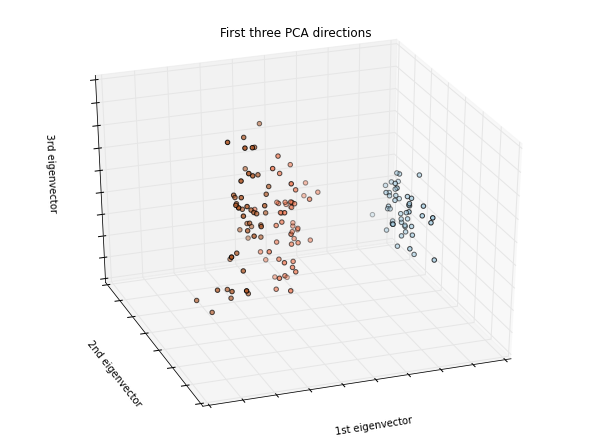

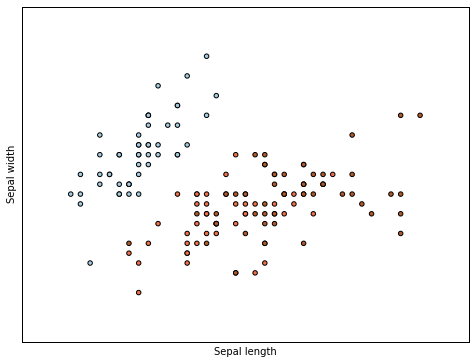

In [4]:
%matplotlib inline
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

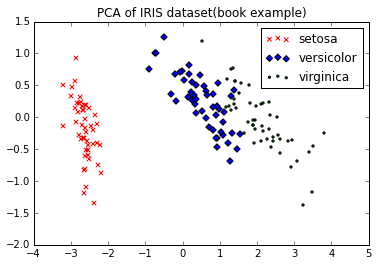

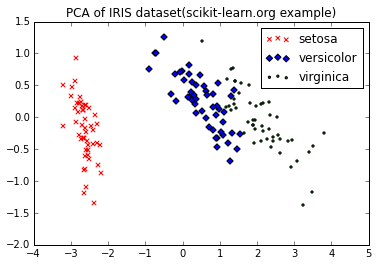

In [5]:
%matplotlib inline 

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y=data.target
x=data.data
target_names = data.target_names
pca=PCA(n_components=2)
reduced_X=pca.fit_transform(x)

#Mastering Machine Learning with scikit-learn 예제
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.figure(1)
plt.scatter(red_x, red_y, c='r', marker='x', label=target_names[0])
plt.scatter(blue_x, blue_y, c='b', marker='D', label=target_names[1])
plt.scatter(green_x, green_y, c='g', marker='.', label=target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset(book example)')

#scikit-learn 예제
plt.figure(2)
for c, m, i, target_name in zip("rbg", "xD.", [0, 1, 2], target_names):
    plt.scatter(reduced_X[y == i, 0], reduced_X[y == i, 1],marker=m, c=c, label=target_name)

plt.legend()
plt.title('PCA of IRIS dataset(scikit-learn.org example)')
plt.show()

###Fifth Example(Dimensionality reduction with PCA)

In [ ]:
from os import walk, path
import numpy as np
import mahotas as mh
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = []
y = []
for dir_path, dir_names, file_names in walk('data/att-faces'):
    for fn in file_names:
        if fn[-3:] == 'pgm':
            image_filename = path.join(dir_path, fn)
            X.append(scale(mh.imread(image_filename, as_grey=True).reshape(10304).astype('float32')))
            y.append(dir_path)
X = np.array(X)



In [7]:
# We then randomly split the images into training and test sets, and fit the PCA object on the training set:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

print len(X_train), len(X_test), len(y_train), len(y_test)

300 100 300 100


In [8]:
#We reduce all of the instances to 150 dimensions and train a logistic regression 
#classifier. The data set contains forty classes; scikit-learn automatically creates  
#binary classifiers using the one versus all strategy behind the scenes:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print 'The original dimensions of the training data were', X_train.shape
print 'The reduced dimensions of the training data are', X_train_reduced.shape


classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)
#Finally, we evaluate the performance of the classifier using cross-validation and a 
#test set. The average per-class F1 score of the classifier trained on the full data was 
#0.94, but required significantly more time to train and could be prohibitively slow in 
#an application with more training instances:
print 'Cross validation accuracy:', np.mean(accuracies), accuracies


classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print classification_report(y_test, predictions)

The original dimensions of the training data were (300, 10304)
The reduced dimensions of the training data are (300, 150)
Cross validation accuracy: 0.787721624212 [ 0.78632479  0.7628866   0.81395349]
             precision    recall  f1-score   support

data/att-faces\s1       1.00      1.00      1.00         2
data/att-faces\s10       1.00      1.00      1.00         2
data/att-faces\s11       1.00      1.00      1.00         3
data/att-faces\s12       1.00      1.00      1.00         2
data/att-faces\s13       1.00      1.00      1.00         4
data/att-faces\s14       1.00      0.67      0.80         3
data/att-faces\s16       0.75      1.00      0.86         3
data/att-faces\s17       1.00      1.00      1.00         2
data/att-faces\s18       1.00      1.00      1.00         2
data/att-faces\s19       1.00      0.50      0.67         2
data/att-faces\s2       0.75      1.00      0.86         3
data/att-faces\s21       1.00      1.00      1.00         4
data/att-faces\s22       0